# 1. Importation des bibliothèques nécessaires

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
# Chemin vers le dataset
data_path = '../data/raw/brain-tumor-mri-dataset/'

# 2. Exploration de la structure des données

In [9]:
classes = os.listdir(data_path)
print(f"Classes trouvées : {classes}")

Classes trouvées : ['glioma', 'meningioma', 'notumor', 'pituitary']


In [10]:
# Compter le nombre d'images dans chaque classe
class_counts = {cls: len(os.listdir(os.path.join(data_path, cls))) for cls in classes}

In [11]:
# Compter le nombre d'images et calculer le poids par classe
class_stats = {}
for cls in classes:
    class_path = os.path.join(data_path, cls)
    class_images = os.listdir(class_path)
    total_size = sum(os.path.getsize(os.path.join(class_path, img)) for img in class_images)
    class_stats[cls] = {
        'count': len(class_images),
        'size': total_size
    }

# Afficher les statistiques par classe
print("\nStatistiques par classe :")
for cls, stats in class_stats.items():
    size_mb = stats['size'] / (1024 * 1024)  # Convertir en MB
    print(f"{cls}: {stats['count']} images, {size_mb:.2f} MB")

# Calculer le total
total_images = sum(stats['count'] for stats in class_stats.values())
total_size = sum(stats['size'] for stats in class_stats.values())
total_size_mb = total_size / (1024 * 1024)  # Convertir en MB

print(f"\nNombre total d'images : {total_images}")
print(f"Poids total des données : {total_size_mb:.2f} MB")



Statistiques par classe :
glioma: 1621 images, 29.50 MB
meningioma: 1775 images, 38.00 MB
notumor: 2000 images, 37.89 MB
pituitary: 1757 images, 48.64 MB

Nombre total d'images : 7153
Poids total des données : 154.03 MB


# 3. Identification des fichiers corrompus ou les anomalies.

Vérifiez si toutes les images peuvent être ouvertes.

In [12]:
invalid_files = []
for cls in classes:
    for img_name in os.listdir(os.path.join(data_path, cls)):
        try:
            img_path = os.path.join(data_path, cls, img_name)
            with Image.open(img_path) as img:
                img.verify()  # Vérification du fichier
        except Exception as e:
            invalid_files.append(img_path)
            print(f"Erreur avec l'image {img_name}: {e}")

print("Fichiers corrompus ou invalides :", invalid_files)

Fichiers corrompus ou invalides : []


# 4. Affichage des images pour chaque classe

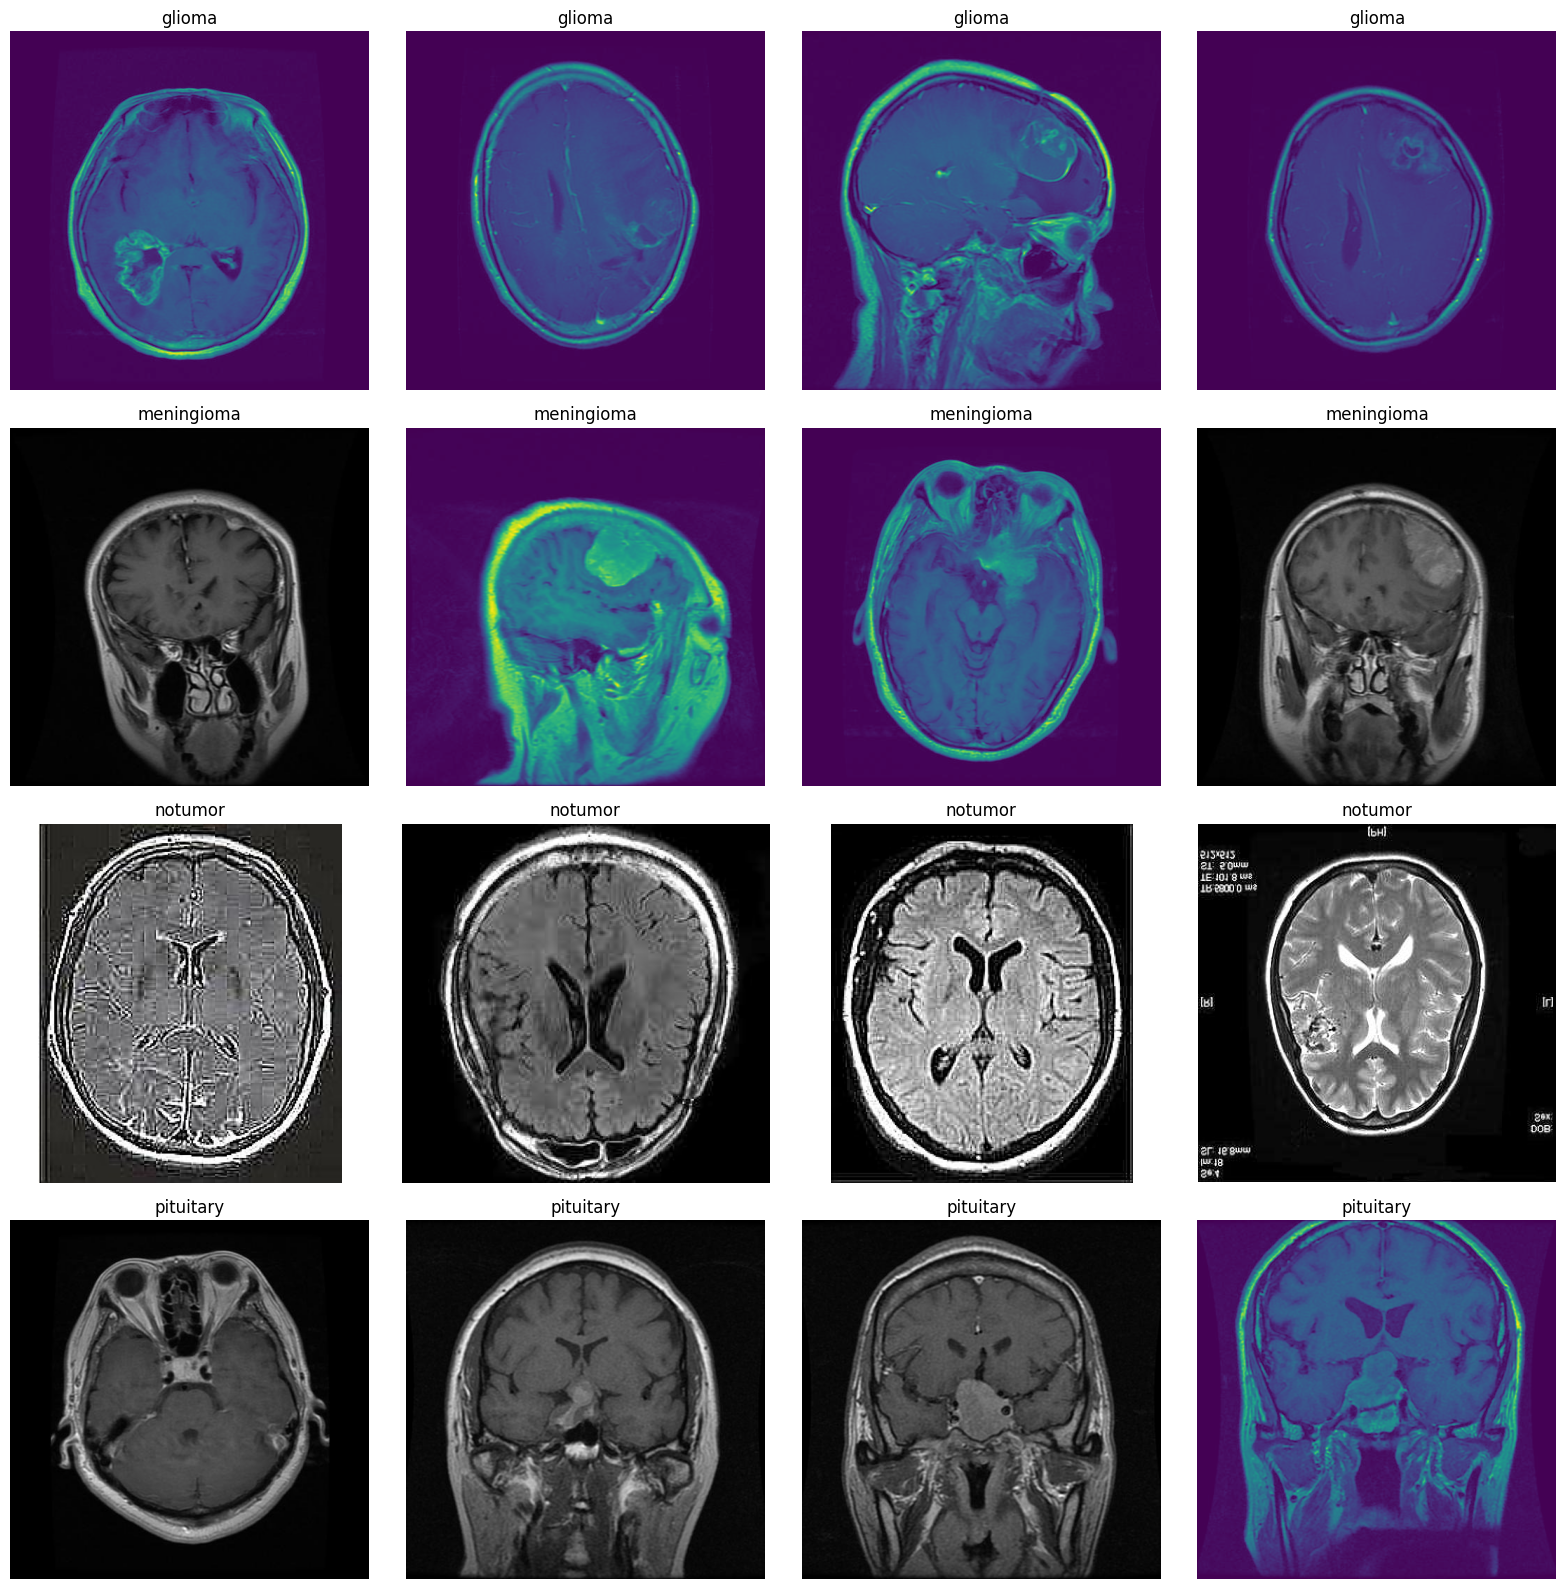

In [13]:
def afficher_exemples_images(data_path, classes, n=4):
    plt.figure(figsize=(16, len(classes) * 4))
    for i, cls in enumerate(classes):
        images = os.listdir(os.path.join(data_path, cls))[:n]
        for j, img_name in enumerate(images):
            img_path = os.path.join(data_path, cls, img_name)
            img = Image.open(img_path)
            plt.subplot(len(classes), n, i * n + j + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

afficher_exemples_images(data_path, classes)

# 5. Statistiques des dimensions des images

In [14]:
dimensions = []
for cls in classes:
    for img_name in os.listdir(os.path.join(data_path, cls)):
        try:
            with Image.open(os.path.join(data_path, cls, img_name)) as img:
                dimensions.append(img.size)
        except Exception as e:
            print(f"Erreur avec l'image {img_name}: {e}")

dim_df = pd.DataFrame(dimensions, columns=["Largeur", "Hauteur"])
print("\nStatistiques des dimensions des images :")
print(dim_df.describe())


Statistiques des dimensions des images :
           Largeur      Hauteur
count  7153.000000  7153.000000
mean    446.641968   449.038585
std     131.694857   125.674042
min     150.000000   168.000000
25%     400.000000   417.000000
50%     512.000000   512.000000
75%     512.000000   512.000000
max    1920.000000  1446.000000


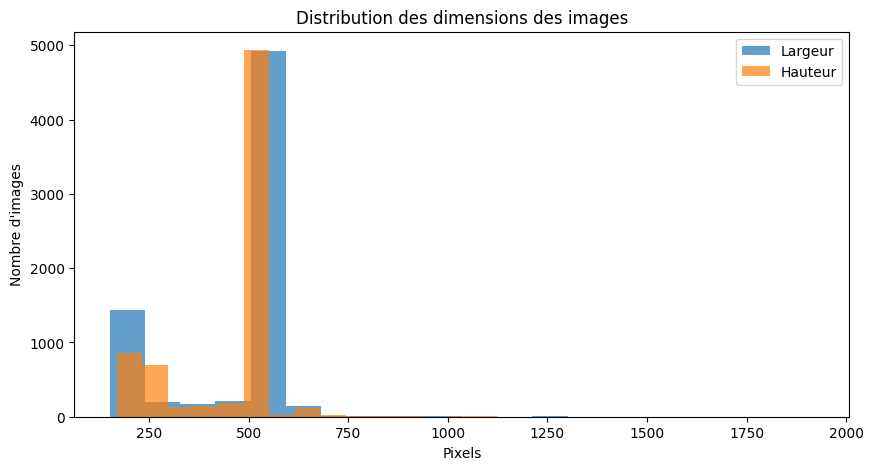

In [15]:
# Distribution des dimensions
plt.figure(figsize=(10, 5))
plt.hist(dim_df['Largeur'], bins=20, alpha=0.7, label="Largeur")
plt.hist(dim_df['Hauteur'], bins=20, alpha=0.7, label="Hauteur")
plt.legend()
plt.title("Distribution des dimensions des images")
plt.xlabel("Pixels")
plt.ylabel("Nombre d'images")
plt.show()

# 6. Distribution des classes

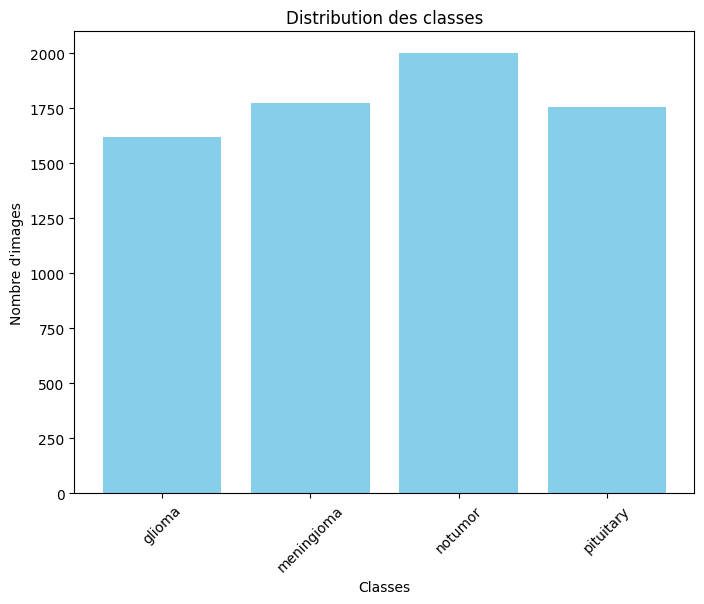

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Distribution des classes")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()